## 0. Importing external modules

In [1]:
## path for mdules

import sys
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/xscale")
import xscale

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/powerspec/powerspec")
import powerspec as pp

In [4]:
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/diags-CMEMS-on-occigen/common-lib/")
import GriddedData
import WavenumberSpectrum as ws


In [5]:
## imports

import numpy as np
import xarray as xr
import time

In [6]:
#- Other modules
import numpy.ma as ma

### palette
import matplotlib.cm as mplcm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

import glob
import os 

%matplotlib inline

In [7]:
config='NATL60'
case='CJM165'
freq='1d'
region='GS'

year='2013'
month='03'
date_list=[]
for day in np.arange(1,32):
    if day < 10:
        date='y'+str(year)+'m'+str(month)+'d0'+str(day)
    else:
        date='y'+str(year)+'m'+str(month)+'d'+str(day)
    date_list.append(date)


In [8]:
if region == 'EU':
    imin=3858
    imax=5076
    jmin=424
    jmax=3286
    
#cdffindij -w -80.418  -40.000   26.991   47.986 -c /store/molines/NATL60/NATL60-I/NATL60_coordinates_v4.nc
if region == 'GS':
    imin=63
    imax=2507
    jmin=29
    jmax=1611

In [9]:
## Dataset

gridfile='/store/molines/NATL60/NATL60-I/NATL60_coordinates_v4.nc'
maskfile='/store/molines/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
meshhgrfile='/store/molines/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_hgr.nc'
meshzgrfile='/store/molines/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_zgr.nc'

In [10]:
grid=xr.open_dataset(gridfile)
navlat= grid['nav_lat'][jmin:jmax,imin:imax]
navlon= grid['nav_lon'][jmin:jmax,imin:imax]


In [11]:
navlat

<xarray.DataArray 'nav_lat' (y: 1582, x: 2444)>
[3866408 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    units:      degrees_north
    valid_min:  26.41709
    valid_max:  67.481155
    long_name:  Latitude

In [12]:
datadir='/store/molines/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'
for date in date_list:
    fileU=datadir+'*/'+str(config)+'-'+str(case)+'_'+str(date)+'.'+str(freq)+'_gridU.nc'
    fileV=datadir+'*/'+str(config)+'-'+str(case)+'_'+str(date)+'.'+str(freq)+'_gridV.nc'
    filecurl='/scratch/cnt0024/hmg2840/albert7a/tmp/'+str(config)+'-'+str(case)+'_'+str(date)+'.'+str(freq)+'_socurloverf.nc'
    if not os.path.exists(filecurl):
        print('Computing '+str(filecurl))
        !ln -sf $meshhgrfile mesh_hgr.nc
        !ln -sf $meshzgrfile mesh_zgr.nc
        !ulimit -s unlimited; cdfcurl -u $fileU vozocrtx -v $fileV vomecrty -l 1 -surf -overf -o $filecurl
        !rm mesh*

In [13]:
filescurl='/scratch/cnt0024/hmg2840/albert7a/tmp/'+str(config)+'-'+str(case)+'_y'+str(year)+'m'+str(month)+'d??.'+str(freq)+'_socurloverf.nc'
!ls $filescurl

/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d01.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d02.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d03.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d04.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d05.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d06.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d07.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d08.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d09.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d10.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d11.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d12.1d_socurloverf.nc
/scratch/cnt0024

In [29]:
filescurl_lanczos='/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/'+str(config)+'-'+str(case)+'_y'+str(year)+'m'+str(month)+'d??.'+str(freq)+'_socurloverf_filt-n80-f0.0125.nc'
!ls $filescurl_lanczos

/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d01.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d02.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d03.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d04.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d05.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d06.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d07.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/curl/NATL60-CJM165_y2013m03d08.1d_socurloverf_filt-n80-f0.0125.nc
/scratch/cnt0024

In [14]:
dscurl=xr.open_mfdataset(filescurl,chunks={'time_counter':1,'y':700,'x':1000})

In [30]:
dscurl_lanczos=xr.open_mfdataset(filescurl_lanczos,chunks={'time_counter':1,'y':700,'x':1000})

In [15]:
curl=dscurl.socurloverf

In [31]:
curl_lanczos=dscurl_lanczos.socurloverf_filt

In [16]:
curl

<xarray.DataArray 'socurloverf' (time_counter: 31, y: 3454, x: 5422)>
dask.array<shape=(31, 3454, 5422), dtype=float32, chunksize=(1, 700, 1000)>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2013-03-01T12:00:00 ... 2013-03-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:             -
    valid_min:         -1000.0
    valid_max:         1000.0
    long_name:         Relative_Vorticity (curl)
    short_name:        socurl
    iweight:           1
    online_operation:  N/A
    axis:              TYX
    savelog10:         0.0

In [23]:
def filt(w):
    win_box2D = w.window
    win_box2D.set(window='hanning', cutoff=20, dim=['x', 'y'], n=[20, 20])
    bw = win_box2D.boundary_weights(drop_dims=[])
    w_LS = win_box2D.convolve(weights=bw)
    w_SS=w-w_LS
    return w_SS


In [24]:
curl_SS=filt(curl)
curl_LS=curl-curl_SS

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


In [33]:
curl_SS_lanczos=curl_lanczos
curl_LS_lanczos=curl-curl_SS_lanczos

In [25]:
zlat= navlat[600:1200,1800:2400].values
zlon= navlon[600:1200,1800:2400].values
zfull = curl[0,600:1200,1800:2400].values
zhp = curl_SS[0,600:1200,1800:2400].values
zlp = zfull - zhp

In [34]:
zfull_lanczos = curl_lanczos[0,600:1200,1800:2400].values
zhp_lanczos = curl_SS_lanczos[0,600:1200,1800:2400].values
zlp_lanczos = zfull_lanczos - zhp_lanczos

In [26]:
def compute_spectrum(var):
    data = var.squeeze()
    pspec,kstep = pp.wavenumber_spectra(data,zlon,zlat)
    return pspec, kstep

%time spectre_full = compute_spectrum(zfull)
%time spectre_hp   = compute_spectrum(zhp)
%time spectre_lp   = compute_spectrum(zlp)


CPU times: user 2.06 s, sys: 3.21 s, total: 5.27 s
Wall time: 345 ms
CPU times: user 2.23 s, sys: 3.1 s, total: 5.34 s
Wall time: 340 ms
CPU times: user 2.21 s, sys: 3.14 s, total: 5.35 s
Wall time: 333 ms


In [35]:
%time spectre_hp_lanczos   = compute_spectrum(zhp_lanczos)


CPU times: user 3.67 s, sys: 5.06 s, total: 8.72 s
Wall time: 815 ms


In [42]:
rad2cyc = 1.E3 / np.pi / 2. 

def nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,title,figname):
    fig, axarr = plt.subplots(1,1)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    #
    pspec,kstep = spectre_full
    pspec_lp,kstep_lp = spectre_lp
    pspec_hp,kstep_hp = spectre_hp
    pspec_hp_lanczos,kstep_hp_lanczos = spectre_hp_lanczos
    skpspec = pspec * rad2cyc
    skpspec_lp = pspec_lp * rad2cyc
    skpspec_hp = pspec_hp * rad2cyc
    skpspec_hp_lanczos = pspec_hp_lanczos * rad2cyc
    axarr.plot(skpspec[1:],kstep[1:], 'k-', lw=3, label='Full relative vorticity')
    axarr.plot(skpspec_hp[1:],kstep_hp[1:], 'b-', lw=3, label='hanning')
    axarr.plot(skpspec_hp_lanczos[1:],kstep_hp_lanczos[1:], 'g-', lw=3, label='lanczos')
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_title('',fontsize=20)
    axarr.grid(True,which='both',ls='-')
    axarr.axis('tight')
    axarr.legend(loc="lower left", fontsize=25)
    axarr.tick_params(labelsize=25)
    plt.title(title, fontsize=25)
    plt.savefig(figname)



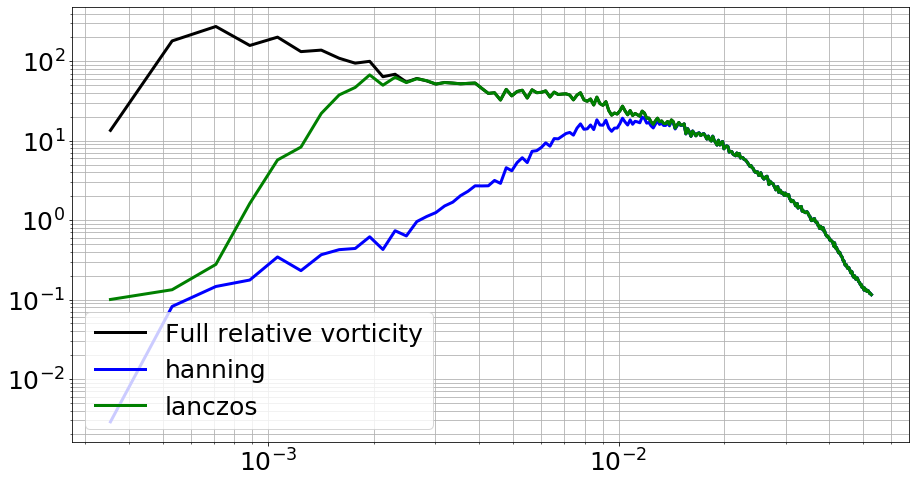

In [37]:
nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,'compare_hanning_lanczos_filt')


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


CPU times: user 2.43 s, sys: 3.27 s, total: 5.7 s
Wall time: 391 ms
CPU times: user 4.2 s, sys: 6.21 s, total: 10.4 s
Wall time: 434 ms
CPU times: user 2.3 s, sys: 3.06 s, total: 5.36 s
Wall time: 297 ms


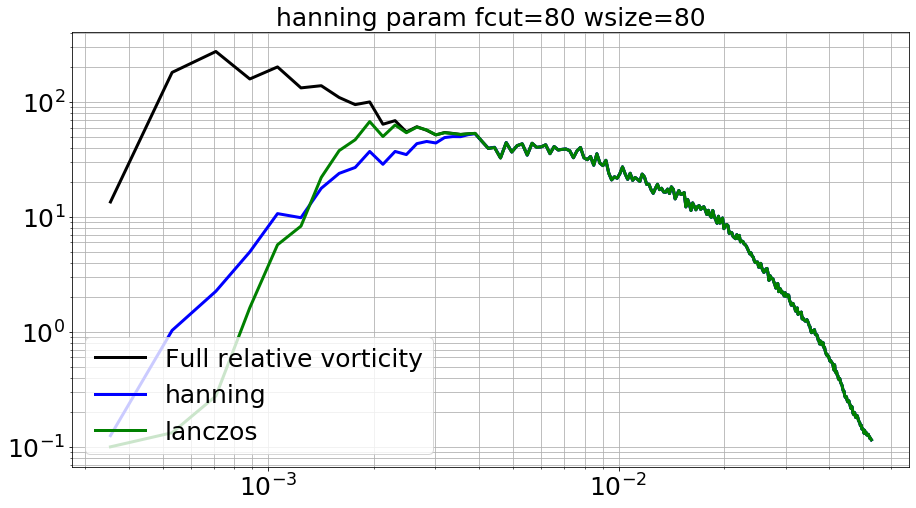

In [45]:
    def filt(w):
        win_box2D = w.window
        win_box2D.set(window='hanning', cutoff=80, dim=['x', 'y'], n=[80,80])
        bw = win_box2D.boundary_weights(drop_dims=[])
        w_LS = win_box2D.convolve(weights=bw)
        w_SS=w-w_LS
        return w_SS
    curl_SS=filt(curl)
    curl_LS=curl-curl_SS
    zfull = curl[0,600:1200,1800:2400].values
    zhp = curl_SS[0,600:1200,1800:2400].values
    zlp = zfull - zhp 
    %time spectre_full = compute_spectrum(zfull)
    %time spectre_hp   = compute_spectrum(zhp)
    %time spectre_lp   = compute_spectrum(zlp)
    nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,'hanning param fcut=80 wsize=80','compare_hanning_lanczos_filt_fcut80_wsize80.png')


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


CPU times: user 2.6 s, sys: 3.85 s, total: 6.45 s
Wall time: 391 ms
CPU times: user 2.18 s, sys: 3.12 s, total: 5.3 s
Wall time: 303 ms
CPU times: user 2.28 s, sys: 3.25 s, total: 5.52 s
Wall time: 335 ms


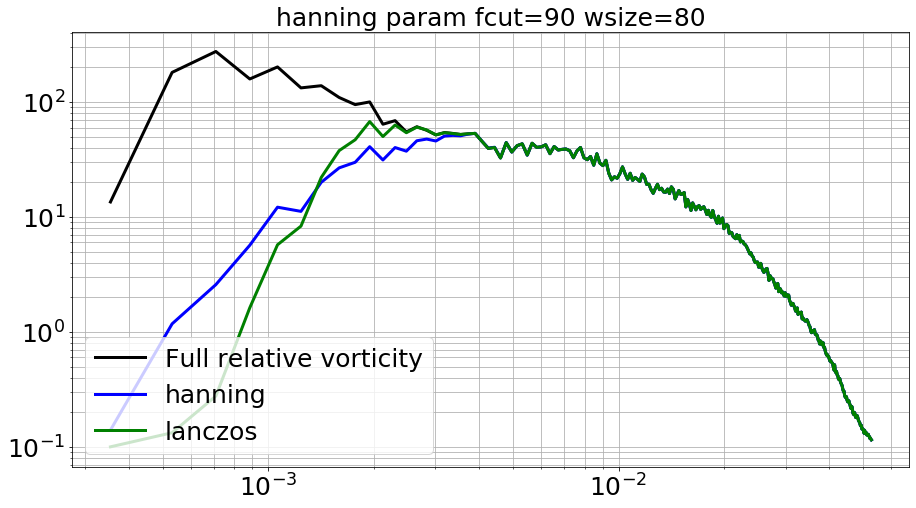

In [52]:
    def filt(w):
        win_box2D = w.window
        win_box2D.set(window='hanning', cutoff=90, dim=['x', 'y'], n=[80,80])
        bw = win_box2D.boundary_weights(drop_dims=[])
        w_LS = win_box2D.convolve(weights=bw)
        w_SS=w-w_LS
        return w_SS
    curl_SS=filt(curl)
    curl_LS=curl-curl_SS
    zfull = curl[0,600:1200,1800:2400].values
    zhp = curl_SS[0,600:1200,1800:2400].values
    zlp = zfull - zhp 
    %time spectre_full = compute_spectrum(zfull)
    %time spectre_hp   = compute_spectrum(zhp)
    %time spectre_lp   = compute_spectrum(zlp)
    nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,'hanning param fcut=90 wsize=80','compare_hanning_lanczos_filt_fcut90_wsize80.png')


In [ ]:
    def filt(w):
        win_box2D = w.window
        win_box2D.set(window='hanning', cutoff=80, dim=['x', 'y'], n=[100,100])
        bw = win_box2D.boundary_weights(drop_dims=[])
        w_LS = win_box2D.convolve(weights=bw)
        w_SS=w-w_LS
        return w_SS
    curl_SS=filt(curl)
    curl_LS=curl-curl_SS
    zfull = curl[0,600:1200,1800:2400].values
    zhp = curl_SS[0,600:1200,1800:2400].values
    zlp = zfull - zhp 
    %time spectre_full = compute_spectrum(zfull)
    %time spectre_hp   = compute_spectrum(zhp)
    %time spectre_lp   = compute_spectrum(zlp)
    nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,'hanning param fcut=80 wsize=100','compare_hanning_lanczos_filt_fcut80_wsize100.png')


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


CPU times: user 2.35 s, sys: 3.48 s, total: 5.83 s
Wall time: 345 ms
CPU times: user 2.29 s, sys: 2.99 s, total: 5.29 s
Wall time: 323 ms
CPU times: user 2.18 s, sys: 3.04 s, total: 5.22 s
Wall time: 326 ms


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


CPU times: user 2.3 s, sys: 3.27 s, total: 5.57 s
Wall time: 342 ms
CPU times: user 2.29 s, sys: 3.22 s, total: 5.51 s
Wall time: 305 ms
CPU times: user 2.29 s, sys: 3.21 s, total: 5.51 s
Wall time: 302 ms


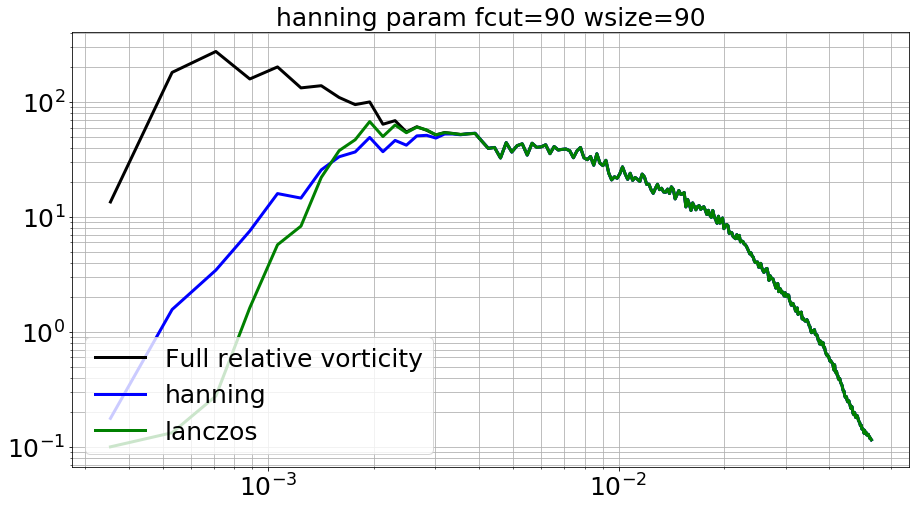

In [51]:
    def filt(w):
        win_box2D = w.window
        win_box2D.set(window='hanning', cutoff=90, dim=['x', 'y'], n=[90,90])
        bw = win_box2D.boundary_weights(drop_dims=[])
        w_LS = win_box2D.convolve(weights=bw)
        w_SS=w-w_LS
        return w_SS
    curl_SS=filt(curl)
    curl_LS=curl-curl_SS
    zfull = curl[0,600:1200,1800:2400].values
    zhp = curl_SS[0,600:1200,1800:2400].values
    zlp = zfull - zhp 
    %time spectre_full = compute_spectrum(zfull)
    %time spectre_hp   = compute_spectrum(zhp)
    %time spectre_lp   = compute_spectrum(zlp)
    nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,'hanning param fcut=90 wsize=90','compare_hanning_lanczos_filt_fcut90_wsize90.png')


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


CPU times: user 2.6 s, sys: 3.58 s, total: 6.18 s
Wall time: 479 ms
CPU times: user 2.38 s, sys: 3.23 s, total: 5.62 s
Wall time: 335 ms
CPU times: user 2.28 s, sys: 3.22 s, total: 5.5 s
Wall time: 312 ms


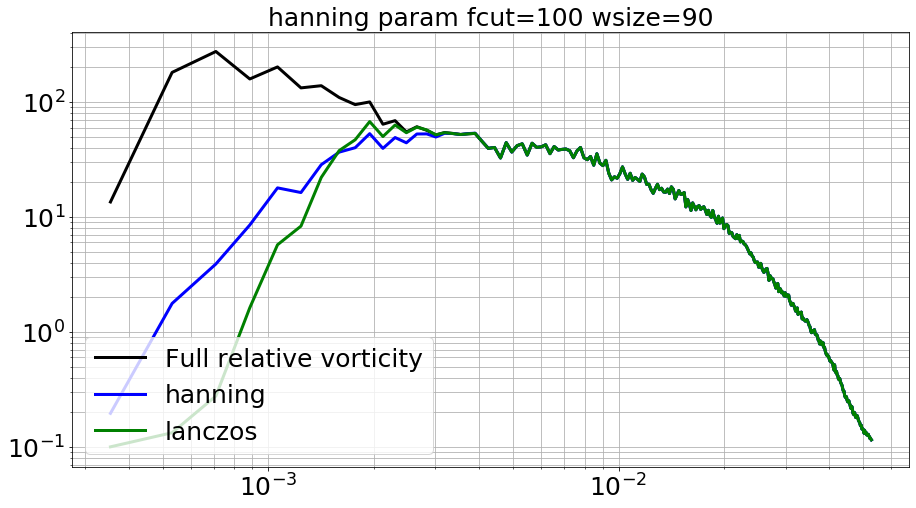

In [50]:
    def filt(w):
        win_box2D = w.window
        win_box2D.set(window='hanning', cutoff=100, dim=['x', 'y'], n=[90,90])
        bw = win_box2D.boundary_weights(drop_dims=[])
        w_LS = win_box2D.convolve(weights=bw)
        w_SS=w-w_LS
        return w_SS
    curl_SS=filt(curl)
    curl_LS=curl-curl_SS
    zfull = curl[0,600:1200,1800:2400].values
    zhp = curl_SS[0,600:1200,1800:2400].values
    zlp = zfull - zhp 
    %time spectre_full = compute_spectrum(zfull)
    %time spectre_hp   = compute_spectrum(zhp)
    %time spectre_lp   = compute_spectrum(zlp)
    nice_spectrum(spectre_full,spectre_hp,spectre_hp_lanczos,'hanning param fcut=100 wsize=90','compare_hanning_lanczos_filt_fcut100_wsize90.png')
